Listing files and directories after unzip:
['brain-tumor-mri-dataset']
Contents of meningioma:
['me-0066.jpg', 'me-0040.jpg', 'me-1012.jpg', 'me-0399.jpg', 'me-1168.jpg', 'me-1708.jpg', 'me-0948.jpg', 'me-1378.jpg', 'me-1624.jpg', 'me-0332.jpg', 'me-0570.jpg', 'me-0171.jpg', 'me-1226.jpg', 'me-0425.jpg', 'me-0456.jpg', 'me-0003.jpg', 'me-1596.jpg', 'me-0268.jpg', 'me-1548.jpg', 'me-0301.jpg', 'me-1243.jpg', 'me-1258.jpg', 'me-1053.jpg', 'me-1603.jpg', 'me-0525.jpg', 'me-1275.jpg', 'me-1746.jpg', 'me-1723.jpg', 'me-0652.jpg', 'me-1388.jpg', 'me-1611.jpg', 'me-1445.jpg', 'me-0544.jpg', 'me-0712.jpg', 'me-1469.jpg', 'me-1091.jpg', 'me-0588.jpg', 'me-1172.jpg', 'me-1551.jpg', 'me-0518.jpg', 'me-0152.jpg', 'me-1257.jpg', 'me-0673.jpg', 'me-1241.jpg', 'me-0920.jpg', 'me-0765.jpg', 'me-1513.jpg', 'me-1650.jpg', 'me-0792.jpg', 'me-1278.jpg', 'me-1252.jpg', 'me-0229.jpg', 'me-1616.jpg', 'me-0670.jpg', 'me-0015.jpg', 'me-0755.jpg', 'me-0727.jpg', 'me-0501.jpg', 'me-0910.jpg', 'me-0820.jpg', 'me-

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


178/178 ━━━━━━━━━━━━━━━━━━━━ 62s 296ms/step - accuracy: 0.3643 - loss: 1.2746 - val_accuracy: 0.5717 - val_loss: 0.9635
Epoch 2/10
  1/178 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - accuracy: 0.4375 - loss: 1.0862

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4375 - loss: 1.0862 - val_accuracy: 0.7727 - val_loss: 0.7226
Epoch 3/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 68s 260ms/step - accuracy: 0.5913 - loss: 0.9271 - val_accuracy: 0.6456 - val_loss: 0.8278
Epoch 4/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 635us/step - accuracy: 0.7812 - loss: 0.8996 - val_accuracy: 0.5000 - val_loss: 0.8834
Epoch 5/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 46s 251ms/step - accuracy: 0.6399 - loss: 0.8363 - val_accuracy: 0.6911 - val_loss: 0.7761
Epoch 6/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.7812 - loss: 0.5566 - val_accuracy: 0.7727 - val_loss: 0.5171
Epoch 7/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 46s 251ms/step - accuracy: 0.6803 - loss: 0.7791 - val_accuracy: 0.7166 - val_loss: 0.7092
Epoch 8/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 0s 610us/step - accuracy: 0.6250 - loss: 0.8109 - val_accuracy: 0.7273 - val_loss: 0.7172
Epoch 9/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 83s 258ms/step - accuracy: 0.6923 - loss: 0.7381 - val_accura

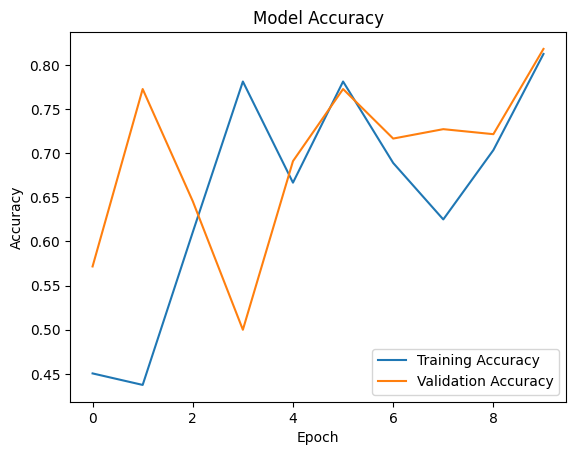

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 695ms/step
Predicted class: glioma


In [ ]:
import zipfile
import os

# Path to the uploaded zip file
zip_path = '/content/dataset.zip'
unzip_dir = '/content/dataset/'

# Unzip the file to the directory
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(unzip_dir)

# Step 1: Check the directory structure after unzip
print("Listing files and directories after unzip:")
unzip_contents = os.listdir(unzip_dir)
print(unzip_contents)

# Step 2: Check the contents of the extracted folder
dataset_folder = os.path.join(unzip_dir, 'brain-tumor-mri-dataset')
dataset_subfolders = os.listdir(dataset_folder)
for folder in dataset_subfolders:
    folder_path = os.path.join(dataset_folder, folder)
    if os.path.isdir(folder_path):
        print(f"Contents of {folder}:")
        print(os.listdir(folder_path))

# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Step 3: Data preprocessing using ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # Use 20% for validation
)

# Correct path to the dataset subfolders (glioma, meningioma, etc.)
dataset_dir = os.path.join(dataset_folder)  # Now we point to the correct directory

# Create train and validation generators using the validation_split
train_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(150, 150),  # Resize images
    batch_size=32,
    class_mode='categorical',  # Ensure labels are one-hot encoded
    subset='training'  # Specify subset for training
)

validation_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',  # Ensure labels are one-hot encoded
    subset='validation'  # Specify subset for validation
)

# Step 4: Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')  # 4 classes: glioma, meningioma, notumor, pituitary
])

# Step 5: Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Step 6: Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

# Step 7: Plot the training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Step 8: Testing the model with a custom image (me-0007.jpg)
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the custom image
img_path = '/content/me-0007.jpg'
img = image.load_img(img_path, target_size=(150, 150))

# Preprocess the image
img_array = image.img_to_array(img)  # Convert image to array
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = img_array / 255.0  # Normalize the image

# Predict the class
predictions = model.predict(img_array)
class_names = ['glioma', 'meningioma', 'notumor', 'pituitary']
predicted_class = class_names[np.argmax(predictions)]

print(f'Predicted class: {predicted_class}')


In [ ]:
# Load the custom image
img_path = '/content/image.jpg'
img = image.load_img(img_path, target_size=(150, 150))

# Preprocess the image
img_array = image.img_to_array(img)  # Convert image to array
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = img_array / 255.0  # Normalize the image

# Predict the class
predictions = model.predict(img_array)
class_names = ['glioma', 'meningioma', 'notumor', 'pituitary']
predicted_class = class_names[np.argmax(predictions)]

print(f'Predicted class: {predicted_class}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: notumor
